In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import timedelta
# import wget
# import os
plt.style.use('seaborn')

In [2]:
# # delete a old file
# # os.remove("./JHU_COVID-19.csv")
# os.remove("./full_data.csv")
# # download the new datasheet form JH
# # url ="https://s3-us-west-1.amazonaws.com/starschema.covid/JHU_COVID-19.csv"
# url ="https://covid.ourworldindata.org/data/ecdc/full_data.csv"
# output_directory = "."
# filename = wget.download(url, out=output_directory)

In [3]:
# read a csv to DataFrame with pandas
data = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")

# data from 🔅 Worldometers:
# Cases =  30425. #❗️(103 novos)
# Deaths = 1924 #❗️(11 novos) 😔
# Recupered = 4390
# txfa = Deaths/Cases
# txre = Recupered/Cases

total_data = data.copy()

data.index = pd.to_datetime(data.date)
# sel data form Brazil
ctry = data[data["location"] == 'Brazil']
tested = ctry.copy()

In [4]:
# create a arrays for curve fit parameters of a exponential equation
# xdays = []
# ydata = []
dateCase=[]
# today=datetime.now().date()
# offsetcases = 1000.
# ndays=10
# ################################### Cases #####
# cond_idx = tested.index[np.where(tested["total_cases"]>offsetcases)]
# case1 = cond_idx[0]
# ndate = cond_idx
# ########################################
# for ib in enumerate(ndate):
#     if tested["total_cases"][cond_idx[ib[0]]] >= offsetcases:
#         selday = (ib[1]-case1).days == np.arange(0,len(cond_idx)+ndays,ndays)
#         if True in selday:
#             xdays.append((ib[1]-case1).days)
#             ydata.append(tested["total_cases"][cond_idx[ib[0]]])
#             dateCase.append(tested["date"][cond_idx[ib[0]]])
# >>>>>>>>>

# do fiting
ydata = tested.last("4W").total_cases.values
xdata = np.arange(len(ydata))
ndate = tested.last("1D").index[0]
# datetime para 5 dias de previsao
for i in range(6):
    dateCase.append((ndate+timedelta(days=i)).date())
dateCase = pd.to_datetime(dateCase)
# ajuste exponencial com a func, dos dasos xdata e ydata Brasil
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(b * x) + c
poptbr, pcovbr = curve_fit(func, xdata, ydata)
perrbr = np.sqrt(np.diag(pcovbr))
# Forecast 5 days
# ultimo = (ndate-case1).days
# prbrxdata = np.arange(ultimo-1,ultimo+4)
ultimo = len(xdata)
prbrxdata = np.arange(ultimo-1,ultimo+5)
prbrdata = func(prbrxdata, *poptbr)

serro = func(prbrxdata, *(poptbr+perrbr))
ierro = func(prbrxdata, *poptbr-perrbr)
today = len(xdata)
dprevisto = today
hojebr = func(dprevisto, *poptbr)

# Graphic Brazil

In [10]:
poptbr

array([ 1.02787231e+05,  4.81942787e-02, -4.09156707e+04])

In [9]:
# Cria tabela markdown para colocar no site
dictable = {"Date":[],"PredictionNumberInfections":[],"dataNumber":[]}
real = [int(ydata[-1])]
for kr in range(len(dateCase)):
    if kr !=0 :real.append(str("-"))
dictable["dataNumber"] = real
for i in dateCase:
    dictable["Date"].append(i.strftime(format="%Y-%m-%d"))
dictable['PredictionNumberInfections'] = prbrdata
if len(prbrdata) == len(dictable["Date"]):
    tabela = pd.DataFrame(dictable)
    pmk = tabela.to_markdown()
    print(pmk)
else:
    print("nao deu",len(prbrdata),len(dictable["Date"]))


|    | Date       |   PredictionNumberInfections | dataNumber   |
|---:|:-----------|-----------------------------:|:-------------|
|  0 | 2020-05-19 |                       255848 | 254220       |
|  1 | 2020-05-20 |                       270500 | -            |
|  2 | 2020-05-21 |                       285876 | -            |
|  3 | 2020-05-22 |                       302012 | -            |
|  4 | 2020-05-23 |                       318943 | -            |
|  5 | 2020-05-24 |                       336711 | -            |


In [8]:
f = open('../foo.txt',"w")
f.writelines(pmk)


In [276]:
# #Open the file back and read the contents
# f=open("out.md", "r")
# fl = f.readlines()
# for i in range(len(fl)):
#     if '|    | Date       |   PredictionNumberInfections |   dataNumber |' in fl[i]:
#         print(i,fl[i])
#         f = open(namefile,"w+")
#         f.seek(0,i+1)
        
#         mk = mkfpd.split("\n")

ValueError: must have exactly one of create/read/write/append mode

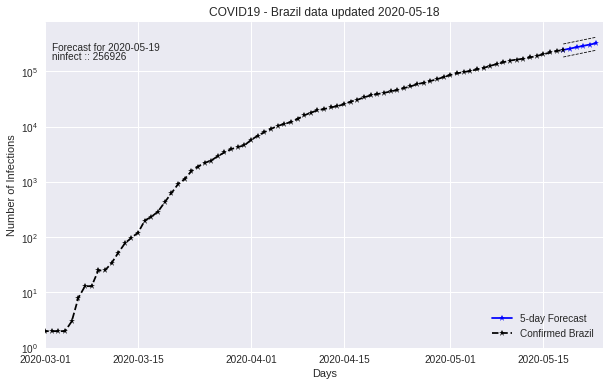

In [234]:
# Graphic Brazil

# Graphic Brazil
fig = plt.figure(figsize=[10,6])
ax2 = plt.subplot()

ax2.plot(dateCase[-len(prbrdata):],prbrdata,"b*-",label="5-day Forecast")
ax2.plot(dateCase[-len(prbrdata):],ierro,'k--',lw=.8)
ax2.plot(dateCase[-len(prbrdata):],serro,'k--',lw=.8)
ax2.plot(tested.index,tested["total_cases"],"k*--",label="Confirmed Brazil")

ax2.text(pd.to_datetime("2020-03-02"),tested["total_cases"][-1],"Forecast for "+str(datetime.now().date()))
ax2.text(pd.to_datetime("2020-03-02"),tested["total_cases"][-8],"ninfect :: "+str(int(hojebr)))
# ax2.axvline(today,ls="dotted",lw=1.8)

ax2.set_title("COVID19 - Brazil data updated "+str(tested["date"][tested.index[-1]]))
ax2.set_xlabel("Days")
ax2.set_ylabel("Number of Infections")
ax2.set_xlim(pd.to_datetime("2020-03-01"),datetime.now().date()+timedelta(days=5))
ax2.set_yscale('log')
ax2.set_ylim(1,)
ax2.legend(loc="lower right")
ax2.grid(1)
plt.show()
# fig.savefig("log_data_forecast_brazil.png",dpi=350)

In [ ]:
#  Countreis of South America
############################SA##############
############################SA##############
today=datetime.now().date()
sa = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands', 'French Guiana', 
      'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
sa = sorted(sa)
san = total_data[(total_data.location.isin(sa)) & (total_data["total_cases"] > 20. )]
psum = san.groupby('date').total_cases.sum()

############################SA##############

fig = plt.figure(figsize=[10,6])
ax = plt.subplot()

for ii in sa:
    p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 20. )]
    if len(p) > 0: 
        ax.plot(p.total_cases.values,label=ii)
        ax.text(len(p),p.total_cases.values.max(),ii)
ax.plot(psum.values,'g*-',label = "Sum South\n America")
ax.text(max(ax.get_xlim())-5,psum.values.max(),"Sum SouthAmerica",color="g")
ax.text(max(ax.get_xlim())-15,1,'update on '+str(datetime.now().date()))
ax.set_yscale('log')
ax.set_title("Countries of South America")
ax.set_ylabel("Number of Infections")
ax.set_xlim(0,max(ax.get_xlim())+15)
ax.set_xlabel('Days after the day with over 20 cases confirmeds')
plt.legend(loc=5)
plt.show()
# fig.savefig("southAmerica_brazil.png",dpi=350)
# plt.close()

In [ ]:
############################ Countries bordering of Brazil ############################
############################ Countries bordering of Brazil ############################
############################ Countries bordering of Brazil ############################

borderBR = ['Argentina', 'Bolivia', 'Brazil', 'Colombia', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname']
borderBR = sorted(borderBR)

# psum.values
############################
fig = plt.figure(figsize=[10,6])
ax = plt.subplot()


for ii in borderBR:
    p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 20. )]
    if len(p) > 0: 
        ax.plot(p.total_cases.values,label=ii)
        ax.text(len(p),p.total_cases.max(),ii)

ax.text(max(ax.get_xlim())-5,20,'update on '+str(today))
ax.set_yscale('log')
ax.set_title("Countries bordering of Brazil")
ax.set_ylabel("Number of Infections")
ax.set_xlim(0,max(ax.get_xlim())+15)
ax.set_xlabel('Days after the day with over 20 cases confirmeds')
plt.legend(loc=5)
plt.show()
# fig.savefig("border_brazil.png",dpi=350)
# plt.close()

In [ ]:
################# world############################ world###########
################# world############################ world###########

top = total_data.sort_values('total_cases',ascending=False).where(total_data.location != 'World').dropna().location.unique()[:4]
top = list(top)
top.append("Brazil")

################# world############################ world###########
################# world############################ world###########

fig = plt.figure(figsize=[10,6])
ax = plt.subplot()


for ii in top:
    if ii == "Brazil":
        p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 100. )]
#         p['total_cases'] = p['total_cases'].add(10.)
    else:
        p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 100. )]
    
    if len(p) > 0:
        ax.plot(p.total_cases.values,label=ii)
        ax.text(len(p),p.total_cases.max(),ii)

ax.text(max(ax.get_xlim())-15,100,'update on '+str(today))
ax.set_yscale('log')
ax.set_title("Countries of World")
ax.set_ylabel("Number of Infections")
ax.set_xlim(0,max(ax.get_xlim())+15)
ax.set_xlabel('Days after the day with over 100 cases confirmeds')
plt.legend(loc=5)
plt.show()
# fig.savefig("top_world.png",dpi=350)
# plt.close()

In [ ]:
# top 5 STATES OF BRAZIL########################
# top 5 STATES OF BRAZIL########################
# top 5 STATES OF BRAZIL########################
url ="https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv"
datos = pd.read_csv(url,header=0,index_col="date")
############
############
listStates = sorted(datos["state"].unique())[:-1]
datos.index = pd.to_datetime(datos.index)
nna = datos.loc[:,["state","totalCases"]].where(datos["state"] !='TOTAL').dropna().sort_values(by="totalCases",ascending=False)
TOP5 = nna.state.unique()[:5]
########################### TOP 5 ############
############
############
fig = plt.figure(figsize=[10,6])
ax = plt.subplot()

for ii in TOP5:
    p = datos[(datos["state"] == ii) & (datos["totalCases"] > 26. )]
    if len(p) > 0: 
        ax.plot(p.totalCases.values,label=ii)
        ax.text(len(p),p.totalCases.values.max(),ii)
ax.text(max(ax.get_xlim())-10,50,'update on '+str(datetime.now().date()))
ax.set_yscale('log')
ax.set_title("5 States of Brazil")
ax.set_ylabel("Number of Infections")
ax.set_xlim(0,max(ax.get_xlim())+15)
ax.set_xlabel('Days after the day with over 20 cases confirmeds')
plt.legend(loc=5)
plt.grid("both")
plt.show()
# fig.savefig("n20cases_TOP5.png",dpi=350)
# plt.close()